<a href="https://colab.research.google.com/github/BhumiRaval123/Machine-Learning/blob/main/ESEPRAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question-1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [ ]:

col_names=['s1','c1','s2','c2','s3','c3','s4','c4','s5','c5','classes' ]
dataset = pd.read_csv("poker-hand-training-true.data",names=col_names)
print(dataset)
dataset.shape

       s1  c1  s2  c2  s3  c3  s4  c4  s5  c5  classes
0       1  10   1  11   1  13   1  12   1   1        9
1       2  11   2  13   2  10   2  12   2   1        9
2       3  12   3  11   3  13   3  10   3   1        9
3       4  10   4  11   4   1   4  13   4  12        9
4       4   1   4  13   4  12   4  11   4  10        9
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..      ...
25005   3   9   2   6   4  11   4  12   2   4        0
25006   4   1   4  10   3  13   3   4   1  10        1
25007   2   1   2  10   4   4   4   1   4  13        1
25008   2  12   4   3   1  10   1  12   4   9        1
25009   1   7   3  11   3   3   4   8   3   7        1

[25010 rows x 11 columns]


(25010, 11)

In [ ]:
dataset_test = pd.read_csv("poker-hand-testing.data",names=col_names)
print(dataset_test)
dataset_test.shape

        s1  c1  s2  c2  s3  c3  s4  c4  s5  c5  classes
0        1   1   1  13   2   4   2   3   1  12        0
1        3  12   3   2   3  11   4   5   2   5        1
2        1   9   4   6   1   4   3   2   3   9        1
3        1   4   3  13   2  13   2   1   3   6        1
4        3  10   2   7   1   2   2  11   4   9        0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..      ...
999995   3   1   1  12   2   9   4   9   2   6        1
999996   3   3   4   5   2   7   1   4   4   3        1
999997   1  11   4   7   3   9   1  13   2   7        1
999998   3  11   1   8   1   1   3  13   2   8        1
999999   2   5   2   9   4   9   2   3   3   3        2

[1000000 rows x 11 columns]


(1000000, 11)

In [ ]:
# Data visulization

no_class = 10  # we have 10 classes of poker hands
cls = {}
for i in range(no_class):
    cls[i] = len(dataset[dataset.classes==i])
print(cls)

# Giving name to diferent class to visulize it
poker_hands = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
hand_name = {
    0: 'Nothing in hand',
    1: 'One pair',
    2: 'Two pairs',
    3: 'Three of a kind',
    4: 'Straight',
    5: 'Flush',
    6: 'Full house',
    7: 'Four of a kind',
    8: 'Straight flush',
    9: 'Royal flush',
}

{0: 12493, 1: 10599, 2: 1206, 3: 513, 4: 93, 5: 54, 6: 36, 7: 6, 8: 5, 9: 5}


In [ ]:
for i in poker_hands:
    print("%s: %d" % (hand_name[i], cls[i]))

Nothing in hand: 12493
One pair: 10599
Two pairs: 1206
Three of a kind: 513
Straight: 93
Flush: 54
Full house: 36
Four of a kind: 6
Straight flush: 5
Royal flush: 5


Text(0, 0.5, 'Number of instances')

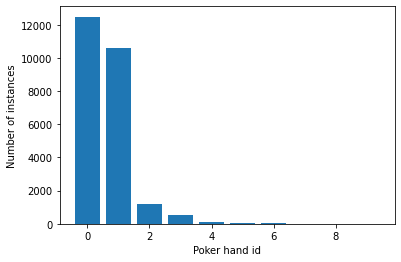

In [ ]:
plt.bar(poker_hands, [cls[i] for i in poker_hands], align='center')
plt.xlabel('Poker hand id')
plt.ylabel('Number of instances')

In [ ]:
# taking Species name in y and all other in x variable
x = dataset.drop(['classes'], axis=1)
y = dataset['classes']

In [ ]:
# spliting data in train and test dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=110) # here 33% dataset will be of testing and 67% will be for training

As this problem is of classification and having more then 2 class so it is better that we should go with KNN classifier if will use Logistic then we have to apply one hot encoding or use one v/s all algorithm so better then that will direct use some other classification technique 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(8, p=8)

In [ ]:
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=8,
                     weights='uniform')

In [ ]:
# printing of classification report
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test, knc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.59      0.77      0.67      4120
           1       0.53      0.43      0.48      3498
           2       0.32      0.02      0.04       395
           3       0.38      0.02      0.03       180
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.57      8254
   macro avg       0.18      0.12      0.12      8254
weighted avg       0.54      0.57      0.54      8254



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


we can see in abover table we are getting overall 56% accuracy while for diffrent set accuracy is present in above graph

Now for testing dataset

In [ ]:
x_test_data = dataset_test.drop(['classes'], axis=1)
y_test_data = dataset_test['classes']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test_data, knc.predict(x_test_data)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      0.76      0.66    501209
           1       0.52      0.42      0.47    422498
           2       0.23      0.02      0.03     47622
           3       0.18      0.01      0.01     21121
           4       0.04      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       1.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.56   1000000
   macro avg       0.26      0.12      0.12   1000000
weighted avg       0.53      0.56      0.53   1000000

